In [1]:
import ResultsInspectors.ga_inspector as gai
import ResultsInspectors.bo_inspector as boi
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import image

from IPython import display
import pylab as pl
import numpy as np
import pandas as pd
import os

import pandas as pd
import numpy as np
from scipy.stats import ttest_ind_from_stats
from statistics import mean
from statistics import stdev
import ast
from collections import defaultdict

accuracies = dict()

results_directory = 'Final Results (Random Initial State)/'

In [2]:
def GA_Plotter(directory_name, linestyle, color):
    D = [0]*1000
    average_sens = 0
    results = gai.read_files(results_directory + directory_name)
    accuracies[directory_name] = []
    
    for run in results:
        if not '(1)' in directory_name:
            run = run[0]

        data = []
        sensor_num = []
        for generation in run:
            for chromosome in generation:
                data.append(chromosome[0])
                sensor_num.append(chromosome[1])

        average_sens = average_sens + int(sensor_num[data.index(max(data))])                
        accuracies[directory_name].append(max(data))

        data = list(data)
        n_calls = len(data)
        iterations = range(1, n_calls + 1)
        data = [np.max(data[:i]) for i in iterations]

        D = [d1 + d2 for d1, d2 in zip(D,data)]

    D = [d / len(results) for d in D]
    gai.plot_convergence(D, plotDataPoints = False, color = color, ls = linestyle, xlabel="Black-box function query #") # + '\nnumber of motion sensors placed: ' + str(average_sens / 5),)
    # plt.show()


    # print(max(D))
    # gai.plot_convergence(D, xlabel="Number of iterations $n$\n" + 'number of motion sensors placed: ' + str(int(sensor_num[acc.index(max(acc))])),)
    # plt.show()


In [3]:
def BO_Plotter(directory_name, holdplot, name, e, linestyle, marker, color):
    maxs = []
    test = []
    D = [0]*1000
    results = boi.read_files(results_directory + directory_name)
    accuracies[directory_name] = []
    
    for index, result in enumerate(results):
        data = [100 - p for p in result.perfs]
        # data.sort()
        
        # data[0] = data[1]
        accuracies[directory_name].append(max(data))
        maxs.append(max(data))

        # D = [d1 + d2 for d1, d2 in zip(D,data)]
        # D = [max(d1, d2) for d1, d2 in zip(D,data)]
        
        data = list(data)

        n_calls = len(data)
        iterations = range(1, n_calls + 1)
        data = [np.max(data[:i]) for i in iterations]
        
        D = [d1 + d2 for d1, d2 in zip(D,data)]
        
        
        # ax1 = boi.plot_convergence(data, plotDataPoints = False, name = name + ' : ' + 'Best Performance Found: ' + "{:.2f}".format(max(data)))
        
        if not holdplot:
            plt.show()
        
    D = [d / len(results) for d in D]
    ax1 = boi.plot_convergence(D, 
                               plotDataPoints = False, 
                               ls = linestyle, 
                               marker = marker,
                               color = color,
                               name = 'the average performance of GA and BO for $\epsilon =$' + str(e))

    # print(max(D))
    print('\t' + directory_name + 'performance: ' + str(np.mean(maxs)) + ' $\pm$ ' + str(np.std(maxs)))
    print('-' * 50)
    
    return ax1, sum(maxs) / 5
    

No handles with labels found to put in legend.


	BO (5-0.5)performance: 72.4758168336011 $\pm$ 1.0895635580188985
--------------------------------------------------


No handles with labels found to put in legend.


	BO (7-0.5)performance: 76.57565137645507 $\pm$ 1.9363906448037151
--------------------------------------------------


No handles with labels found to put in legend.


	BO (9-0.5)performance: 73.45257396655435 $\pm$ 1.6152255725871585
--------------------------------------------------


No handles with labels found to put in legend.


	BO (11-0.5)performance: 74.17916578566698 $\pm$ 1.5998994097247563
--------------------------------------------------


No handles with labels found to put in legend.


	BO (13-0.5)performance: 75.22100019449935 $\pm$ 0.9434954409359625
--------------------------------------------------


No handles with labels found to put in legend.


	BO (15-0.5)performance: 75.30504287716583 $\pm$ 1.4083578794611866
--------------------------------------------------


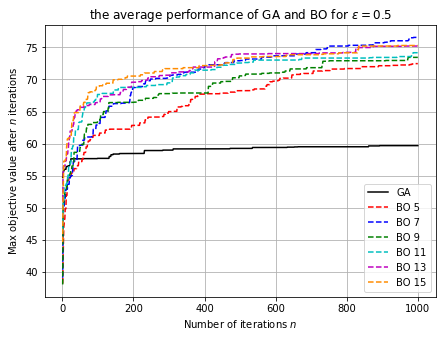

No handles with labels found to put in legend.


	BO (5-1)performance: 68.48702164207734 $\pm$ 4.420616144068898
--------------------------------------------------


No handles with labels found to put in legend.


	BO (7-1)performance: 72.88518321376532 $\pm$ 1.2770574782293624
--------------------------------------------------


No handles with labels found to put in legend.


	BO (9-1)performance: 75.3058874435803 $\pm$ 1.180031346371763
--------------------------------------------------


No handles with labels found to put in legend.


	BO (11-1)performance: 71.32834308198845 $\pm$ 1.3434930525483455
--------------------------------------------------


No handles with labels found to put in legend.


	BO (13-1)performance: 73.21440091082867 $\pm$ 1.9649248742284853
--------------------------------------------------


No handles with labels found to put in legend.


	BO (15-1)performance: 70.70477267066354 $\pm$ 0.9564712333335887
--------------------------------------------------


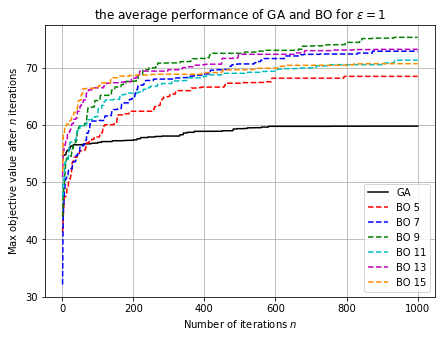

No handles with labels found to put in legend.


	BO (5-2)performance: 58.607638949173875 $\pm$ 0.8458684370089655
--------------------------------------------------


No handles with labels found to put in legend.


	BO (7-2)performance: 55.412317981101125 $\pm$ 0.7129398958335151
--------------------------------------------------


No handles with labels found to put in legend.


	BO (9-2)performance: 55.5374737798076 $\pm$ 1.214766462480173
--------------------------------------------------


No handles with labels found to put in legend.


	BO (11-2)performance: 54.73921864317706 $\pm$ 0.3974447571906339
--------------------------------------------------


No handles with labels found to put in legend.


	BO (13-2)performance: 56.811553800498714 $\pm$ 0.42711277333787384
--------------------------------------------------


No handles with labels found to put in legend.


	BO (15-2)performance: 57.31668748021383 $\pm$ 0.7073187702766429
--------------------------------------------------


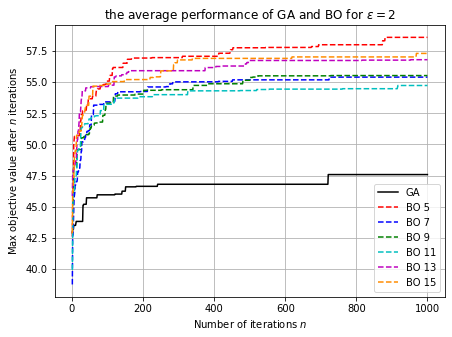

In [4]:
sensorNums = [5, 7, 9, 11, 13, 15]
epsilons = [0.5, 1, 2]

styles = [['', '--'],
           ['', ':'],
           ['', '-.'],
           ['o', '--'], 
           ['o', ':'],
           ['o', '-.']]
        
colors = ['r', 'b', 'g', 'c', 'm', 'darkorange']


for e in epsilons:
    BOnames = ['GA']
    
    fig, ax = plt.subplots(figsize=(7, 5))
    
    dn1 = 'GA (' + str(e) + ')'
    GA_Plotter(dn1, linestyle = '-', color = 'k')
    
    for index, sn in enumerate(sensorNums):
        dn2 = 'BO (' + str(sn) + '-' + str(e) + ')'
        try:
            BO_Plotter(dn2, 
                       holdplot = True, 
                       name = dn2, 
                       e = e,
                       linestyle = styles[0][1], 
                       marker = styles[0][0],
                       color = colors[index])

            BOnames.append('BO ' + str(sn))

        except:
            print('----- No data exist in directory: ' + dn2)
            
    # plt.legend([line1, line2, line3], ['label1', 'label2', 'label3'])
    plt.legend(BOnames)
    # plt.grid()
    plt.show()

# Sensor Locations Animation

In [5]:
def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"

    mycmap = cmap
    mycmap._init()
    
    def f(x):
        return np.clip(x**2,-1,1)
        # return x**2
    
    #mycmap._lut[:,-1] = np.linspace(0.7, 1, N+4)
    # mycmap._lut[:,-1] = np.logspace(0.0, 10, N+4, endpoint=False, base = np.e)

    
    mycmap._lut[:,-1] = np.linspace(0, 1, N + 4, endpoint=False)
    
    # mycmap._lut[:,-1] = np.linalg.norm(mycmap._lut[:,-1])
    # print(type(mycmap._lut[:,-1]))
    return mycmap


def HeatMap(data_x, data_y):
    mycmap = transparent_cmap(plt.cm.autumn)    
    heatmap, xedges, yedges = np.histogram2d(data_x, data_y, bins=100)
    extent = [0.2, 7.7, 0.6, 7.8]
    plt.imshow(heatmap.T, extent=extent, origin='lower', cmap = mycmap)
    
    # heatmap = heatmap, xedges, yedges = np.histogram2d(data_x, data_y, bins=[np.arange(0,400,5),np.arange(0,300,5)])
    # extent = [0.3, 8.2, 0.3, 8.2]
    # plt.imshow(heatmap.T, extent=extent, origin='lower', cmap = mycmap)
    
def HM(x1, x2):
  mycmap = transparent_cmap(plt.cm.autumn) 
  extent = [0.2, 7.7, 0.6, 7.8]
  from scipy.stats import gaussian_kde
  # plt.figure(figsize=(8, 10))

  # fit an array of size [Ndim, Nsamples]
  data = np.vstack([x1, x2])
  kde = gaussian_kde(data)

  # evaluate on a regular grid
  xgrid = np.linspace(min(x1), max(x1), 50);
  ygrid = np.linspace(min(x2), max(x2), 50);
  Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
  Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

  # Plot the result as an image
  plt.imshow(Z.reshape(Xgrid.shape),
            origin='lower', aspect='auto',
            extent=extent,
            cmap = mycmap)
  #cb = plt.colorbar()
  #cb.set_label("density")

def get_sensor_locations(c):
    coordinates = c.get_dictionary()

    Xs = []
    Ys = []
    for key in coordinates.keys():

        if 'x' in key:
            # print(coordinates[key])
            Xs.append(coordinates[key])
        else:
            Ys.append(coordinates[key])

    return Xs, Ys

def get_traces(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith(".csv"): 
            data.append(pd.read_csv(os.path.join(directory, filename)))

        else:
            continue

    data_x = []
    data_y = []

    for df in data:
        # data_x = data_x + list(np.clip(list(df.x), 0.5, 7.5))
        # data_y = data_y + list(np.clip(list(df.y), 0.5, 7.5))
        data_x = data_x + list(df.x)
        data_y = data_y + list(df.y)
        
    # print('X is: ', data_x)
    # print('Y is: ', data_y)
    
    return data_x, data_y

In [59]:
def plot_sensor_locations(sensorNum, epsilon, method, filenumber):
    if method == 'BO':    
        results = boi.read_files('Final Results (Random Initial State)/BO (' + 
                                 str(sensorNum) +
                                 '-' +
                                 str(epsilon) +
                                 ')')    
    elif method == 'GA':
        results = boi.read_files('Final Results (Random Initial State)/GA (0.5)/')
        
    result = results[filenumber]
    configurations = []
    accuracy = []
    last = 0
    
    if method == 'BO':
        data = [100 - p for p in result.perfs]
        losses = list(data)
        n_calls = len(losses)
        maxs = [np.max(losses[:i]) for i in range(1, n_calls + 1)]

        for i in range(len(maxs)):
            if (maxs[i] != last):
                last = maxs[i]
                configurations.append(i)
                accuracy.append(maxs[i])

        configs = result.get_all_configs()
        i = -1
        config_index = configurations[-1]
        c = configs[config_index]
        Xs, Ys = get_sensor_locations(c)
        Xs = [xs * epsilon for xs in Xs]
        Ys = [ys * epsilon for ys in Ys]

    elif method == 'GA':
        _, configurations = result
        config = configurations[-1]
        data = config.GetSensorLocations()[0]
        config = configurations[-1]
        data = config.GetSensorLocations()[0]
        A = [x for x in zip(*data)]  
        Xs, Ys = A[0], A[1]

    agent_x, agent_y = get_traces("Agent Trace Files ROS/")
    #for i in range(len(Xs)):
    xlim=(0.0, 8.0)
    ylim=(0.0, 8.0)

    if method == 'GA':
        plt.scatter(Xs, Ys, color='b')

    elif method == 'BO':
        plt.scatter(Xs, Ys, color='r')

    plt.xlim(*xlim)
    plt.ylim(*ylim)

    img = plt.imread("testcase.jpg")
    im = plt.imshow(np.flipud(img), origin='upper', extent=[0.0, 8.0, 0.0, 8.0])

    HM(agent_x, agent_y)
    plt.gca().invert_yaxis()

    display.clear_output(wait=True)
    # display.display(pl.gcf())

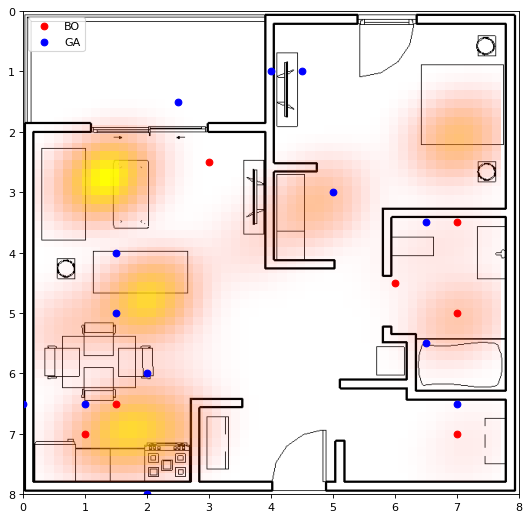

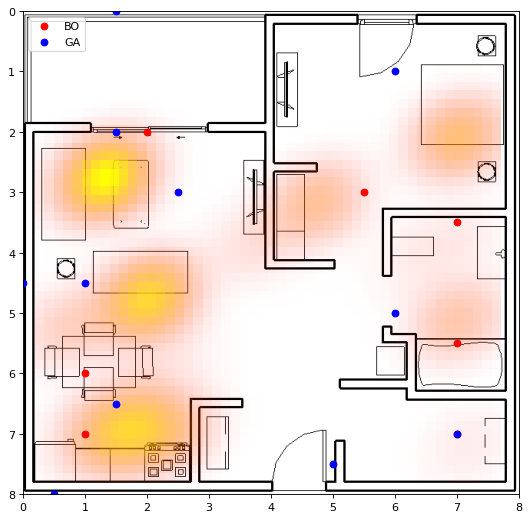

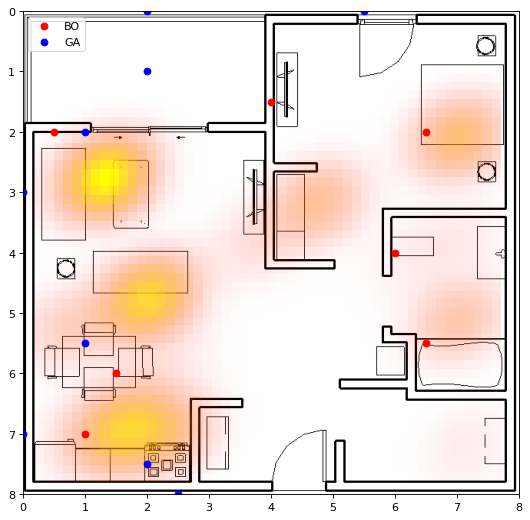

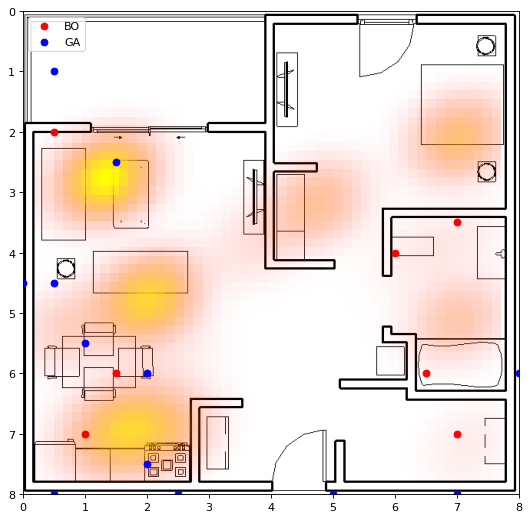

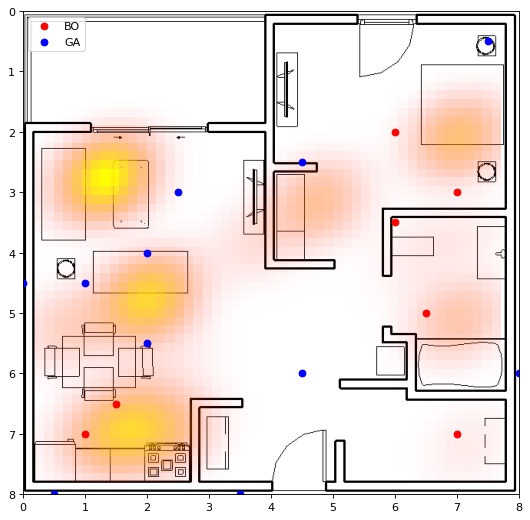

In [62]:
sensorNum = 7
epsilon = 0.5

for filenumber in [0, 1, 2, 3, 4]:
    fig, ax = plt.subplots(figsize=(8.0, 8.0), dpi=80)
    plot_sensor_locations(sensorNum, epsilon, 'BO', filenumber)
    plot_sensor_locations(sensorNum, epsilon, 'GA', filenumber)
    plt.legend(['BO', 'GA'], loc = 'upper left')

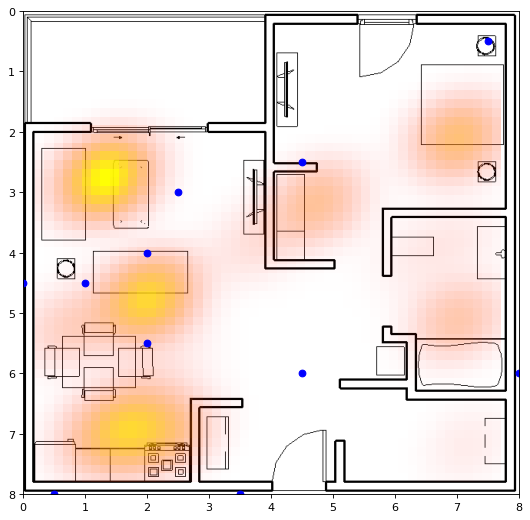

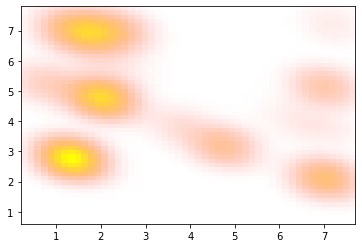

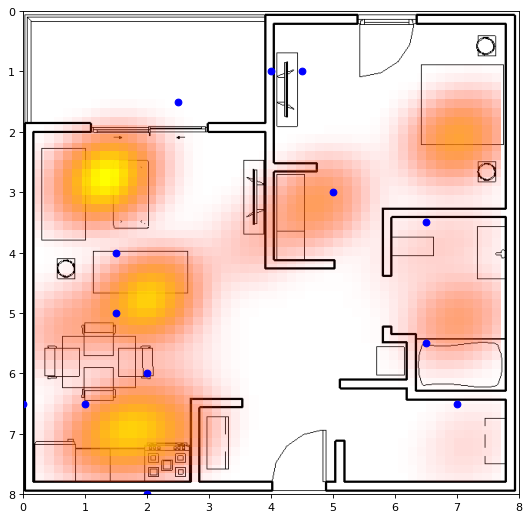

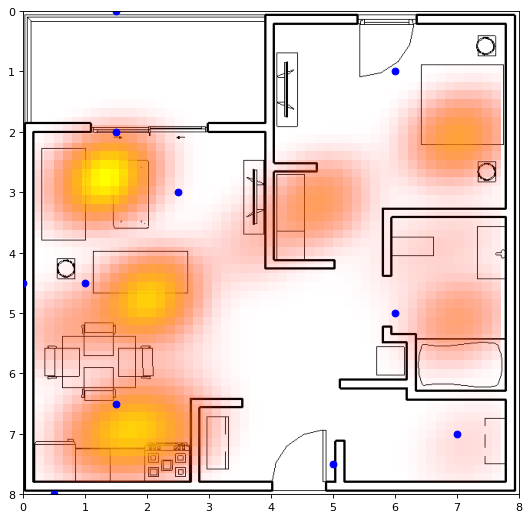

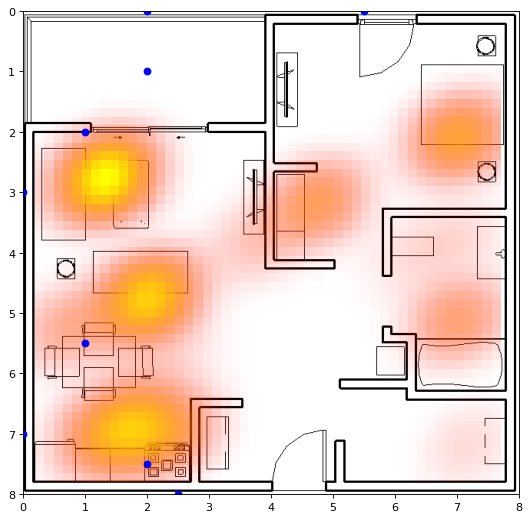

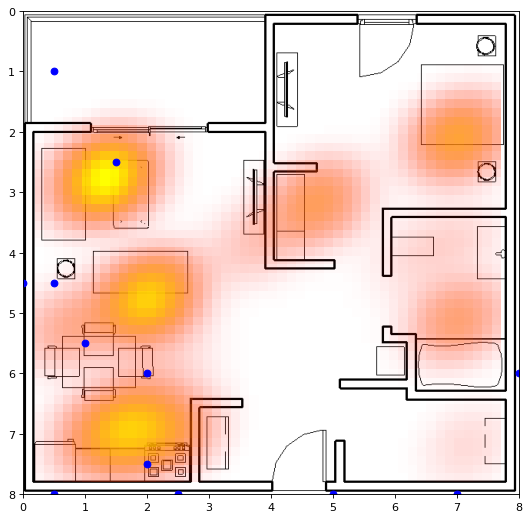

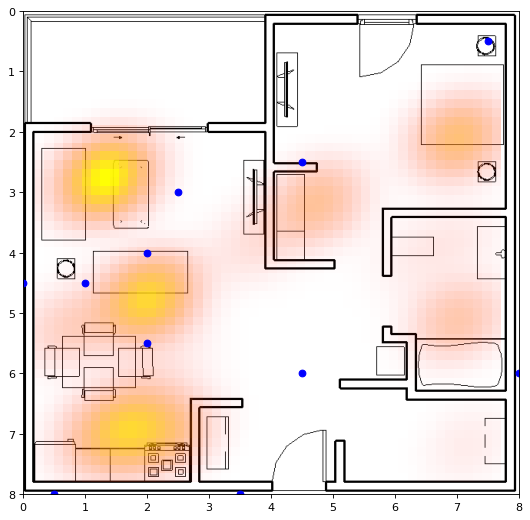

In [28]:
from SensorOptimizers.GeneticAlgorithm import Chromosome

results = boi.read_files('Final Results (Random Initial State)/GA (0.5)/')
accuracies_bo = []

for result in results:
    _, configurations = result
    
    for config in configurations:
        config = configurations[-1]
        
        data = config.GetSensorLocations()[0]
    
        agent_x, agent_y = get_traces("Agent Trace Files ROS/")
        HM(agent_x, agent_y)
    
        A = [x for x in zip(*data)]  
        Xs, Ys = A[0], A[1]
        fig, ax = plt.subplots(figsize=(8.0, 8.0), dpi=80)
        
        for i in range(len(Xs)):          
            xlim=(0.0, 8.0)
            ylim=(0.0, 8.0)
            
            plt.scatter(Xs[i], Ys[i], color='b')
            
            plt.xlim(*xlim)
            plt.ylim(*ylim)
             
            img = plt.imread("testcase.jpg")
            
            im = plt.imshow(np.flipud(img), origin='upper', extent=[0, 8.0, 0, 8.0])
            HM(agent_x, agent_y)
            
            plt.gca().invert_yaxis()
        
        display.clear_output(wait=True)
        display.display(pl.gcf())
        break

# Statistics

In [47]:


statistic = pd.DataFrame()
pvalue = pd.DataFrame()

def compare(data, minVal, maxVal = None): 
  data_compare = pd.DataFrame()

  for i1, v1 in pvalue.items():
    for i2, v2 in pvalue.items():
      if maxVal == None:
        if data.loc[i1,i2] < minVal:
          data_compare.loc[i1,i2] = 1
        else:
          data_compare.loc[i1,i2] = 0

      if maxVal != None:
        if data.loc[i1,i2] < minVal or data.loc[i1,i2] > maxVal:
          data_compare.loc[i1,i2] = 1
        else:
          data_compare.loc[i1,i2] = 0
  return data_compare


mean_std = pd.DataFrame()
for key1 in accuracies:
    for key2 in accuracies:
        
        # print(np.std(accuracies[key1]))
        # print(np.mean(accuracies[key1]))
        
        mean_std.loc[key1, 'Mean'] = np.mean(accuracies[key1])
        mean_std.loc[key1, 'STD'] = np.std(accuracies[key1])
                                             
        
        t = ttest_ind_from_stats(mean1=np.mean(accuracies[key1]), std1=np.std(accuracies[key1]), nobs1=5,
                                 mean2=np.mean(accuracies[key2]), std2=np.std(accuracies[key2]), nobs2=5)
        
        statistic.loc[key1,key2] = t.statistic
        pvalue.loc[key1,key2] = t.pvalue
        

In [48]:
statistic

,GA (0.5),BO (5-0.5),BO (7-0.5),BO (9-0.5),BO (11-0.5),BO (13-0.5),BO (15-0.5),GA (1),BO (5-1),BO (7-1),...,BO (11-1),BO (13-1),BO (15-1),GA (2),BO (5-2),BO (7-2),BO (9-2),BO (11-2),BO (13-2),BO (15-2)
GA (0.5),0.000000,-18.468103,-16.958368,-15.751914,-16.690987,-23.962370,-19.541515,-0.070251,-4.321938,-17.508838,...,-14.992197,-13.434453,-16.899369,14.914995,1.729560,7.277449,5.651891,9.440373,5.433785,4.040662
BO (5-0.5),18.468103,0.000000,-4.126012,-1.120992,-1.967691,-4.258958,-3.552880,8.519413,1.959014,-0.545287,...,1.483331,-0.735058,2.731489,30.804300,22.481529,29.303055,23.210588,34.196074,29.929689,26.094200
BO (7-0.5),16.958368,4.126012,0.000000,2.769417,2.133387,1.406252,1.186596,10.159428,3.747673,3.557589,...,4.978470,2.724446,6.078383,26.855804,19.013818,22.933575,20.579694,24.700927,22.287089,20.889504
BO (9-0.5),15.751914,1.120992,-2.769417,0.000000,-0.714641,-2.113934,-1.932924,8.638266,2.359162,0.616159,...,2.260862,0.209377,3.273145,26.720155,18.205541,22.847716,19.821151,25.155832,22.271812,20.462079
BO (11-0.5),16.690987,1.967691,-2.133387,0.714641,0.000000,-1.254246,-1.181129,9.115502,2.707383,1.413441,...,3.051268,0.851370,4.167896,27.616132,19.239739,23.958046,20.750592,26.368418,23.452179,21.554962
BO (13-0.5),23.962370,4.258958,-1.406252,2.113934,1.254246,0.000000,-0.110858,10.504030,3.331202,3.289518,...,5.301992,2.058486,7.516570,35.871113,29.316587,37.455404,28.615090,44.734424,39.747061,33.951560
BO (15-0.5),19.541515,3.552880,-1.186596,1.932924,1.181129,0.110858,0.000000,10.063920,3.286008,2.846166,...,4.568538,1.933725,6.042212,30.759138,22.726644,28.179066,23.765932,31.425251,28.098616,25.522348
GA (1),0.070251,-8.519413,-10.159428,-8.638266,-9.115502,-10.504030,-10.063920,0.000000,-3.585193,-8.623466,...,-7.541840,-8.092566,-7.422038,7.883599,0.808775,3.030874,2.816249,3.557627,2.094347,1.711960
BO (5-1),4.321938,-1.959014,-3.747673,-2.359162,-2.707383,-3.331202,-3.286008,3.585193,0.000000,-2.137312,...,-1.375114,-2.185102,-1.096428,10.053517,4.908215,6.529174,6.316100,6.926077,5.878395,5.579291
BO (7-1),17.508838,0.545287,-3.557589,-0.616159,-1.413441,-3.289518,-2.846166,8.623466,2.137312,0.000000,...,1.878071,-0.314131,3.055755,29.378395,20.842046,26.713303,22.008433,30.337482,26.690947,23.846356


In [49]:
pvalue

,GA (0.5),BO (5-0.5),BO (7-0.5),BO (9-0.5),BO (11-0.5),BO (13-0.5),BO (15-0.5),GA (1),BO (5-1),BO (7-1),...,BO (11-1),BO (13-1),BO (15-1),GA (2),BO (5-2),BO (7-2),BO (9-2),BO (11-2),BO (13-2),BO (15-2)
GA (0.5),1.000000e+00,7.613500e-08,1.483330e-07,2.635874e-07,1.679142e-07,9.802677e-09,4.888000e-08,0.945718,0.002539,1.155776e-07,...,3.869007e-07,9.028691e-07,1.524229e-07,4.026976e-07,1.219634e-01,8.573900e-05,4.803694e-04,1.302591e-05,6.205403e-04,3.732311e-03
BO (5-0.5),7.613500e-08,1.000000e+00,3.316621e-03,2.948108e-01,8.464546e-02,2.765299e-03,7.477959e-03,0.000028,0.085789,6.004247e-01,...,1.762762e-01,4.832926e-01,2.578634e-02,1.340295e-09,1.622014e-08,1.992576e-09,1.260898e-08,5.844505e-10,1.684607e-09,4.995768e-09
BO (7-0.5),1.483330e-07,3.316621e-03,1.000000e+00,2.431858e-02,6.544689e-02,1.972828e-01,2.694274e-01,0.000008,0.005643,7.426779e-03,...,1.081563e-03,2.606880e-02,2.964575e-04,3.977998e-09,6.059507e-08,1.386241e-08,3.254208e-08,7.711577e-09,1.737031e-08,2.893246e-08
BO (9-0.5),2.635874e-07,2.948108e-01,2.431858e-02,1.000000e+00,4.951529e-01,6.745905e-02,8.931663e-02,0.000025,0.046018,5.549119e-01,...,5.365011e-02,8.393872e-01,1.130296e-02,4.140793e-09,8.517122e-08,1.427888e-08,4.371852e-08,6.675216e-09,1.746450e-08,3.404271e-08
BO (11-0.5),1.679142e-07,8.464546e-02,6.544689e-02,4.951529e-01,1.000000e+00,2.451581e-01,2.714720e-01,0.000017,0.026766,1.952345e-01,...,1.579058e-02,4.193168e-01,3.131121e-03,3.188592e-09,5.523182e-08,9.816667e-09,3.049216e-08,4.598935e-09,1.161910e-08,2.260190e-08
BO (13-0.5),9.802677e-09,2.765299e-03,1.972828e-01,6.745905e-02,2.451581e-01,1.000000e+00,9.144596e-01,0.000006,0.010366,1.102997e-02,...,7.266397e-04,7.353270e-02,6.819993e-05,3.995474e-10,1.985290e-09,2.832771e-10,2.405774e-09,6.884071e-11,1.765552e-10,6.187658e-10
BO (15-0.5),4.888000e-08,7.477959e-03,2.694274e-01,8.931663e-02,2.714720e-01,9.144596e-01,1.000000e+00,0.000008,0.011088,2.160607e-02,...,1.829292e-03,8.920638e-02,3.085671e-04,1.355999e-09,1.489025e-08,2.717260e-09,1.046134e-08,1.143860e-09,2.779554e-09,5.953421e-09
GA (1),9.457184e-01,2.768983e-05,7.541811e-06,2.502881e-05,1.687124e-05,5.873083e-06,8.093687e-06,1.000000,0.007134,2.534411e-05,...,6.659227e-05,4.019390e-05,7.460731e-05,4.851990e-05,4.420311e-01,1.628775e-02,2.262419e-02,7.426362e-03,6.954633e-02,1.252632e-01
BO (5-1),2.539426e-03,8.578868e-02,5.643003e-03,4.601835e-02,2.676629e-02,1.036586e-02,1.108791e-02,0.007134,1.000000,6.504818e-02,...,2.063726e-01,6.038029e-02,3.047962e-01,8.156471e-06,1.181448e-03,1.824175e-04,2.287869e-04,1.212994e-04,3.706731e-04,5.227337e-04
BO (7-1),1.155776e-07,6.004247e-01,7.426779e-03,5.549119e-01,1.952345e-01,1.102997e-02,2.160607e-02,0.000025,0.065048,1.000000e+00,...,9.719348e-02,7.614571e-01,1.568335e-02,1.952394e-09,2.945502e-08,4.149212e-09,1.918182e-08,1.513037e-09,4.176817e-09,1.018584e-08


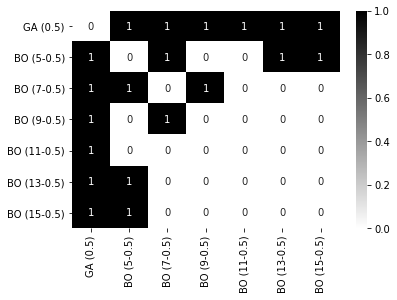

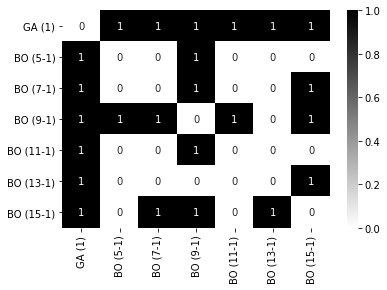

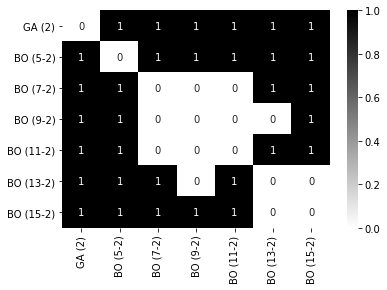

In [120]:
import seaborn as sns

compare_pvalue = compare(pvalue, 0.05)

for epsilon in ['0.5', '1', '2']:
    sn = '1'

    rows = ['GA (' + epsilon + ')',
            'BO (5' '-' + epsilon + ')',
            'BO (7' + '-' + epsilon + ')',
            'BO (9' + '-' + epsilon + ')',
            'BO (11' + '-' + epsilon + ')',
            'BO (13' + '-' + epsilon + ')',
            'BO (15' + '-' + epsilon + ')',
           ]

    df = compare_pvalue.filter(like=epsilon + ')').loc[rows]
    sns.heatmap(df, annot=True, cmap="binary")
    plt.show()

<AxesSubplot:>

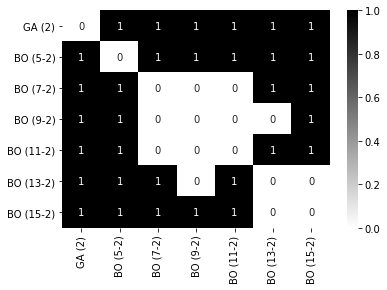

In [119]:
sns.heatmap(df, annot=True, cmap="binary")

<AxesSubplot:>

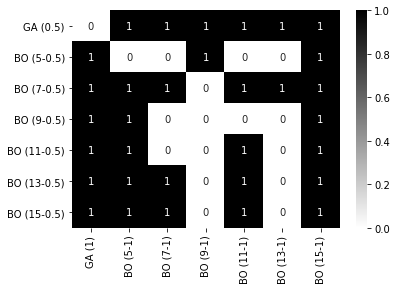

In [112]:
sns.heatmap(df2, annot=True, cmap="binary")

<AxesSubplot:>

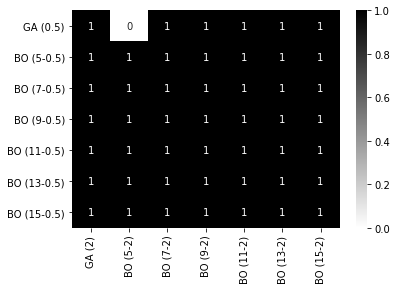

In [113]:
sns.heatmap(df3, annot=True, cmap="binary")

In [33]:
compare_pvalue

,GA (0.5),BO (5-0.5),BO (7-0.5),BO (9-0.5),BO (11-0.5),BO (13-0.5),BO (15-0.5),GA (1),BO (5-1),BO (7-1),...,BO (11-1),BO (13-1),BO (15-1),GA (2),BO (5-2),BO (7-2),BO (9-2),BO (11-2),BO (13-2),BO (15-2)
GA (0.5),False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,False,True,True,True,True,True
BO (5-0.5),True,False,True,False,False,True,True,True,False,False,...,False,False,True,True,True,True,True,True,True,True
BO (7-0.5),True,True,False,True,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
BO (9-0.5),True,False,True,False,False,False,False,True,True,False,...,False,False,True,True,True,True,True,True,True,True
BO (11-0.5),True,False,False,False,False,False,False,True,True,False,...,True,False,True,True,True,True,True,True,True,True
BO (13-0.5),True,True,False,False,False,False,False,True,True,True,...,True,False,True,True,True,True,True,True,True,True
BO (15-0.5),True,True,False,False,False,False,False,True,True,True,...,True,False,True,True,True,True,True,True,True,True
GA (1),False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,False,True,True,True,False,False
BO (5-1),True,False,True,True,True,True,True,True,False,False,...,False,False,False,True,True,True,True,True,True,True
BO (7-1),True,False,True,False,False,True,True,True,False,False,...,False,False,True,True,True,True,True,True,True,True


In [30]:
accuracies

{'GA (0.5)': [59.20654171008339,
  58.46397709606621,
  58.81294486369056,
  61.36173092374693,
  60.56300754983406],
 'BO (5-0.5)': [72.53531346565532,
  72.61944733901878,
  71.04585236116188,
  74.33707580493547,
  71.84139519723406],
 'BO (7-0.5)': [77.759200571683,
  78.14387709180707,
  72.87521688564335,
  77.66019839601842,
  76.43976393712354],
 'BO (9-0.5)': [75.71947692789789,
  73.45120675837717,
  71.24094497778786,
  72.19819205431386,
  74.65304911439495],
 'BO (11-0.5)': [74.57935506543546,
  76.41979623684443,
  72.64251012139778,
  75.15137285781385,
  72.10279464684334],
 'BO (13-0.5)': [76.2618684383928,
  73.67976452700307,
  75.04708517539488,
  76.16416505866096,
  74.95211777304506],
 'BO (15-0.5)': [73.06799032276506,
  77.48137754933919,
  75.37680312164908,
  75.0068509363294,
  75.59219245574644],
 'GA (1)': [61.17076754801031,
  61.166357419057476,
  54.252014315576155,
  58.80070273518317,
  63.5421408345152],
 'BO (5-1)': [63.130640372182334,
  72.7079425

In [128]:
BO05 = [72.4, 76.5, 73.4, 74.1, 75.2, 75.3]
BO1 = [68.4, 72.8, 75.3, 71.3, 73.2, 70.7]
BO2 = [58.6, 55.4, 55.5, 54.7, 56.8, 57.3]

print(np.mean(BO05))
print(np.std(BO05))
print('---')
print(np.mean(BO1))
print(np.std(BO1))
print('---')
print(np.mean(BO2))
print(np.std(BO2))

ttest_ind_from_stats(mean1=np.mean(BO05), std1=np.std(BO05), nobs1=5,
                     mean2=np.mean(BO1),  std2=np.std(BO1), nobs2=5)

74.48333333333333
1.3483529046787233
---
71.95
2.1639085008382377
---
56.38333333333333
1.3234005020736872


Ttest_indResult(statistic=2.221785369513813, pvalue=0.057023073923396284)

In [129]:
ttest_ind_from_stats(mean1=np.mean(BO05), std1=np.std(BO05), nobs1=5,
                     mean2=np.mean(BO2),  std2=np.std(BO2), nobs2=5)

Ttest_indResult(statistic=21.422160241589626, pvalue=2.3729445984028056e-08)

In [130]:
ttest_ind_from_stats(mean1=np.mean(BO1), std1=np.std(BO1), nobs1=5,
                     mean2=np.mean(BO2),  std2=np.std(BO2), nobs2=5)

Ttest_indResult(statistic=13.72283526030185, pvalue=7.666517360110553e-07)